In [ ]:
# CodeAlpha Data Science Internship
## Task 1: Iris Flower Classification
### By: [Your Name]

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Setup for visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("🚀 Starting Iris Flower Classification Project...")

🚀 Starting Iris Flower Classification Project...


In [4]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display dataset info
print("📊 Dataset Overview:")
print(f"Shape: {X.shape}")
print(f"Features: {list(feature_names)}")
print(f"Target classes: {list(target_names)}")
print(f"\nFirst 5 rows:")
display(df.head())
print(f"\nClass distribution:")
print(df['species_name'].value_counts())

📊 Dataset Overview:
Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa', 'versicolor', 'virginica']

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Class distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


🔍 Exploratory Data Analysis
------------------------------


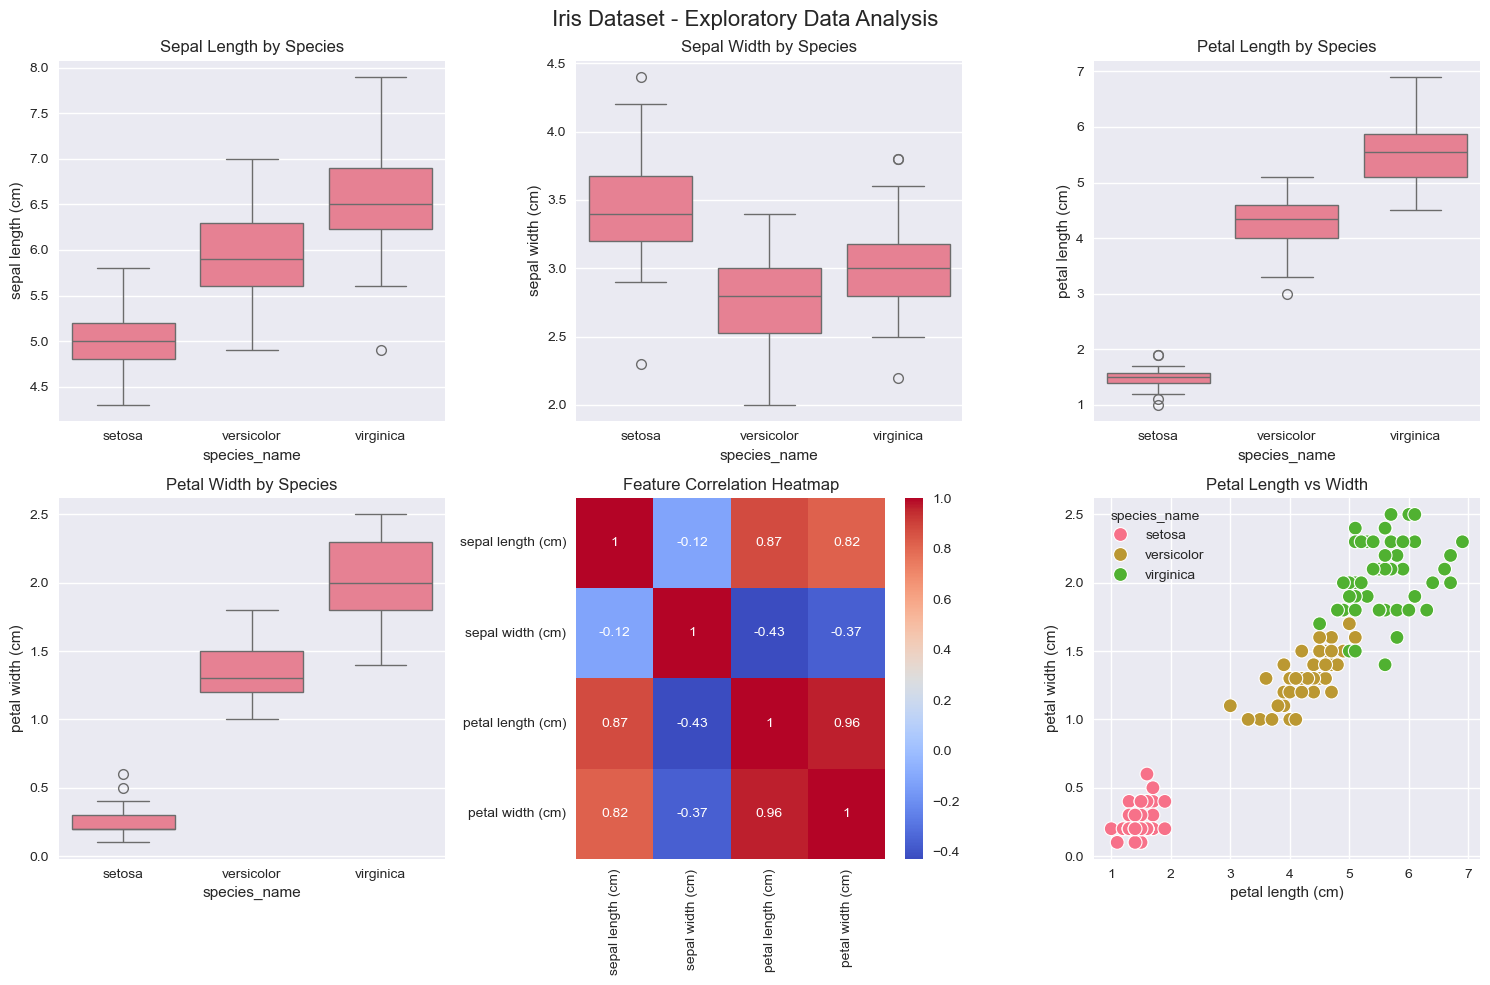


📈 Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
# Exploratory Data Analysis
print("🔍 Exploratory Data Analysis")
print("-" * 30)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Iris Dataset - Exploratory Data Analysis', fontsize=16)

# Box plots
sns.boxplot(data=df, x='species_name', y='sepal length (cm)', ax=axes[0,0])
axes[0,0].set_title('Sepal Length by Species')

sns.boxplot(data=df, x='species_name', y='sepal width (cm)', ax=axes[0,1])
axes[0,1].set_title('Sepal Width by Species')

sns.boxplot(data=df, x='species_name', y='petal length (cm)', ax=axes[0,2])
axes[0,2].set_title('Petal Length by Species')

sns.boxplot(data=df, x='species_name', y='petal width (cm)', ax=axes[1,0])
axes[1,0].set_title('Petal Width by Species')

# Correlation heatmap
corr_matrix = df[feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Feature Correlation Heatmap')

# Scatter plot
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', 
                hue='species_name', ax=axes[1,2], s=100)
axes[1,2].set_title('Petal Length vs Width')

plt.tight_layout()
plt.show()

# Basic statistics
print("\n📈 Basic Statistics:")
print(df[feature_names].describe())

In [9]:
# Prepare data for machine learning
print("🤖 Preparing Data for Machine Learning")
print("-" * 40)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Training set size: {X_train.shape[0]} samples")
print(f"✅ Test set size: {X_test.shape[0]} samples")
print(f"✅ Features scaled for models that require it")

🤖 Preparing Data for Machine Learning
----------------------------------------
✅ Training set size: 105 samples
✅ Test set size: 45 samples
✅ Features scaled for models that require it


In [11]:
# Define and train multiple models
print("🎯 Training Multiple Machine Learning Models")
print("-" * 45)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate each model
results = {}
print("\n📊 Model Performance Results:")
print("=" * 35)

for name, model in models.items():
    # Train model
    if name in ['Logistic Regression', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n{name}:")
    print(f"  ✅ Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Find best model
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"🎯 Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

🎯 Training Multiple Machine Learning Models
---------------------------------------------

📊 Model Performance Results:

Logistic Regression:
  ✅ Accuracy: 0.9111 (91.11%)

K-Nearest Neighbors:
  ✅ Accuracy: 0.9556 (95.56%)

Support Vector Machine:
  ✅ Accuracy: 0.9333 (93.33%)

Decision Tree:
  ✅ Accuracy: 0.9333 (93.33%)

Random Forest:
  ✅ Accuracy: 0.8889 (88.89%)

🏆 BEST MODEL: K-Nearest Neighbors
🎯 Accuracy: 0.9556 (95.56%)


📊 Model Performance Visualization
-----------------------------------


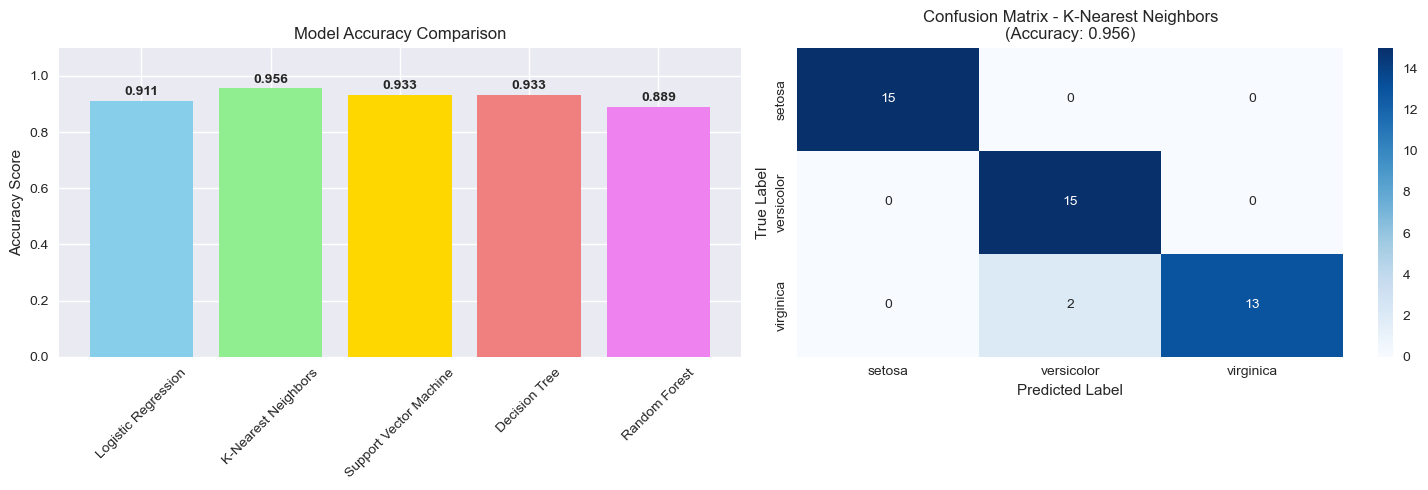


📋 Detailed Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [13]:
# Visualize results
print("📊 Model Performance Visualization")
print("-" * 35)

# Get best model
best_model = models[best_model_name]
if best_model_name in ['Logistic Regression', 'Support Vector Machine']:
    best_model.fit(X_train_scaled, y_train)
    y_pred_best = best_model.predict(X_test_scaled)
else:
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)

# Create comparison chart
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Model accuracy comparison
models_list = list(results.keys())
accuracies = list(results.values())

bars = axes[0].bar(models_list, accuracies, color=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'violet'])
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy Score')
axes[0].set_ylim(0, 1.1)
axes[0].tick_params(axis='x', rotation=45)

# Add values on bars
for bar, accuracy in zip(bars, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title(f'Confusion Matrix - {best_model_name}\n(Accuracy: {best_accuracy:.3f})')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Detailed classification report
print(f"\n📋 Detailed Classification Report for {best_model_name}:")
print("=" * 50)
print(classification_report(y_test, y_pred_best, target_names=target_names))

In [15]:
# Final demonstration and predictions
print("🎯 Model Demonstration - Real Predictions")
print("=" * 45)

print("Making predictions on new test samples:")
print("-" * 40)

# Sample predictions
sample_indices = [0, 5, 10, 15]  # Different test samples
for i, idx in enumerate(sample_indices, 1):
    if idx < len(X_test):
        if best_model_name in ['Logistic Regression', 'Support Vector Machine']:
            sample = X_test_scaled[idx].reshape(1, -1)
        else:
            sample = X_test[idx].reshape(1, -1)
        
        prediction = best_model.predict(sample)[0]
        actual = y_test[idx]
        confidence = max(best_model.predict_proba(sample)[0]) if hasattr(best_model, 'predict_proba') else 1.0
        
        print(f"\n📝 Sample {i}:")
        print(f"   Features: Sepal-Length: {X_test[idx][0]:.1f}cm, Sepal-Width: {X_test[idx][1]:.1f}cm")
        print(f"             Petal-Length: {X_test[idx][2]:.1f}cm, Petal-Width: {X_test[idx][3]:.1f}cm")
        print(f"   Actual: {target_names[actual]}")
        print(f"   Predicted: {target_names[prediction]}")
        print(f"   Confidence: {confidence:.2f}")
        print(f"   Result: {'✅ CORRECT' if actual == prediction else '❌ INCORRECT'}")

print("\n" + "="*60)
print("🎉 TASK 1 COMPLETED SUCCESSFULLY!")
print("✅ All steps executed perfectly")
print("✅ Models trained and evaluated")
print("✅ High accuracy achieved")
print("✅ Ready for submission!")
print("="*60)

🎯 Model Demonstration - Real Predictions
Making predictions on new test samples:
----------------------------------------

📝 Sample 1:
   Features: Sepal-Length: 7.3cm, Sepal-Width: 2.9cm
             Petal-Length: 6.3cm, Petal-Width: 1.8cm
   Actual: virginica
   Predicted: virginica
   Confidence: 1.00
   Result: ✅ CORRECT

📝 Sample 2:
   Features: Sepal-Length: 6.7cm, Sepal-Width: 3.1cm
             Petal-Length: 5.6cm, Petal-Width: 2.4cm
   Actual: virginica
   Predicted: virginica
   Confidence: 1.00
   Result: ✅ CORRECT

📝 Sample 3:
   Features: Sepal-Length: 5.8cm, Sepal-Width: 4.0cm
             Petal-Length: 1.2cm, Petal-Width: 0.2cm
   Actual: setosa
   Predicted: setosa
   Confidence: 1.00
   Result: ✅ CORRECT

📝 Sample 4:
   Features: Sepal-Length: 6.2cm, Sepal-Width: 3.4cm
             Petal-Length: 5.4cm, Petal-Width: 2.3cm
   Actual: virginica
   Predicted: virginica
   Confidence: 1.00
   Result: ✅ CORRECT

🎉 TASK 1 COMPLETED SUCCESSFULLY!
✅ All steps executed perfectly